# Data is collected with the help of google form and have performed EDA which helped me to draw some insights Customer Attitude is my target column my aim is to find  which factor affect the customer while selecting the Insurance,customer Expectations after sales and predict the attitude of customer towards products Logistic regression and KNearestClassifier is used to build model reason of using Logistic regression is it works good for binary classification and reason for using KNearestClassifier is Knn works well on small data and also plotted confusion matrix which gives me True positive rate around 73 %

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import warnings 
warnings.filterwarnings('ignore')
import numpy as np



In [2]:
df=pd.read_excel("Untitled form (Responses).xlsx" )

In [3]:
df.head()

,Customer Attitude,Customization as per Requirement,Variety of Products,Policy Tenure,Flexibility of Payment,Credentials of the Company,Digital enabled,Reviews and Ratings,Service Quality,Solvency Margins,...,Chat bots,Mobile Applications,Product Recommendation,24x7 customer support,Knowledgeable Customer Care Reps,Hassel free claims,Real time Responses,Touchless Claims,Easy claim settlement,Automated Quotes
0,4,5,4.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5,5.0,5.0,5,5.0,5
1,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,...,5.0,4.0,5.0,5.0,5,5.0,5.0,5,4.0,2
2,4,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5,5.0,5.0,5,5.0,4
3,4,5,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,...,4.0,5.0,5.0,5.0,5,5.0,5.0,5,5.0,5
4,4,5,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5,5.0,5.0,5,5.0,5


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Attitude                  184 non-null    int64  
 1   Customization as per Requirement   184 non-null    int64  
 2   Variety of Products                182 non-null    float64
 3   Policy Tenure                      183 non-null    float64
 4   Flexibility of Payment             182 non-null    float64
 5   Credentials of the Company         183 non-null    float64
 6   Digital enabled                    183 non-null    float64
 7   Reviews and Ratings                182 non-null    float64
 8   Service Quality                    183 non-null    float64
 9   Solvency Margins                   183 non-null    float64
 10  Claims settlement ratio            183 non-null    float64
 11  Reasonable Coverage                184 non-null    int64  

In [5]:
df["Customer Attitude "]=np.where(df["Customer Attitude "]<4,0,1)

# 0: negative attitude 1:positive attitude

In [6]:
df.isnull().sum()

Customer Attitude                    0
Customization as per Requirement     0
Variety of Products                  2
Policy Tenure                        1
Flexibility of Payment               2
Credentials of the Company           1
Digital enabled                      1
Reviews and Ratings                  2
Service Quality                      1
Solvency Margins                     1
Claims settlement ratio              1
Reasonable Coverage                  0
Right Premium Amount                 0
Automatic Payments (Auto-debit)      0
Security                             1
Guaranteed Returns                   1
Return on investment                 2
Lower premium amount                 0
Risk coverage                        0
Tax benefit                          1
Policy clarity                       1
Claim settlement                     0
Premature closure                    0
Loan Facilities                      1
Joint policies                       2
Maturity benefits        

In [7]:
pip install skimpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 184    │ │ float64     │ 32    │                                                          │
│ │ Number of columns │ 44     │ │ int32       │ 12    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Customer Attitude             │    0 │       0 │   0.68 │   0.47 │    0 │     0 │     1 │      1 │ ▄    █  │  │
│ │ Customization as per          │    0 │       0 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄▇█  │  │
│ │ Variety of Products           │    2 │     1.1 │      4 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▄▇█  │  │
│ │ Policy Tenure                 │    1 │    0.54 │    3.8 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▄█▆  │  │
│ │ Flexibility of Payme          │    2 │     1.1 │      4 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▄▅█  │  │
│ │ Credentials of the C          │    1 │    0.54 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄██  │  │
│ │ Digital enabled               │    1 │    0.54 │      4 │      1 │    1 │     3 │     5 │      5 │ ▁▁ ▃█▇  │  │
│ │ Reviews and Ratings           │    2 │     1.1 │      4 │   0.95 │    1 │   3.2 │     5 │      5 │  ▁ ▄█▇  │  │
│ │ Service Quality               │    1 │    0.54 │      4 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▄██  │  │
│ │ Solvency Margins              │    1 │    0.54 │    3.8 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▅█▇  │  │
│ │ Claims settlement ra          │    1 │    0.54 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄▇█  │  │
│ │ Reasonable Coverage           │    0 │       0 │    3.8 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▅█▇  │  │
│ │ Right Premium Amount          │    0 │       0 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▅██  │  │
│ │ Automatic Payments (          │    0 │       0 │    3.8 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄█▇  │  │
│ │ Security                      │    1 │    0.54 │      4 │      1 │    1 │     3 │     5 │      5 │ ▁▁ ▄▇█  │  │
│ │ Guaranteed Returns            │    1 │    0.54 │    4.1 │   0.99 │    1 │     4 │     5 │      5 │  ▁ ▃▆█  │  │
│ │ Return on investment          │    2 │     1.1 │      4 │   0.97 │    1 │     3 │     5 │      5 │  ▁ ▅█▇  │  │
│ │ Lower premium amount          │    0 │       0 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▁ ▅▇█  │  │
│ │ Risk coverage                 │    0 │       0 │      4 │      1 │    1 │     3 │     5 │      5 │  ▂ ▄▇█  │  │
│ │ Tax benefit                   │    1 │    0.54 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄▆█  │  │
│ │ Policy clarity                │    1 │    0.54 │    3.8 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▄██  │  │
│ │ Claim settlement              │    0 │       0 │    3.9 │    1.1 │    1 │     3 │     5 │      5 │ ▁▂ ▃██  │  │
│ │ Premature closure             │    0 │       0 │    

In [9]:
for i in df:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Attitude                  184 non-null    int32  
 1   Customization as per Requirement   184 non-null    int64  
 2   Variety of Products                184 non-null    float64
 3   Policy Tenure                      184 non-null    float64
 4   Flexibility of Payment             184 non-null    float64
 5   Credentials of the Company         184 non-null    float64
 6   Digital enabled                    184 non-null    float64
 7   Reviews and Ratings                184 non-null    float64
 8   Service Quality                    184 non-null    float64
 9   Solvency Margins                   184 non-null    float64
 10  Claims settlement ratio            184 non-null    float64
 11  Reasonable Coverage                184 non-null    int64  

In [11]:
df["Customer Attitude "].value_counts()

1    125
0     59
Name: Customer Attitude , dtype: int64

In [12]:
# data is imbalanced


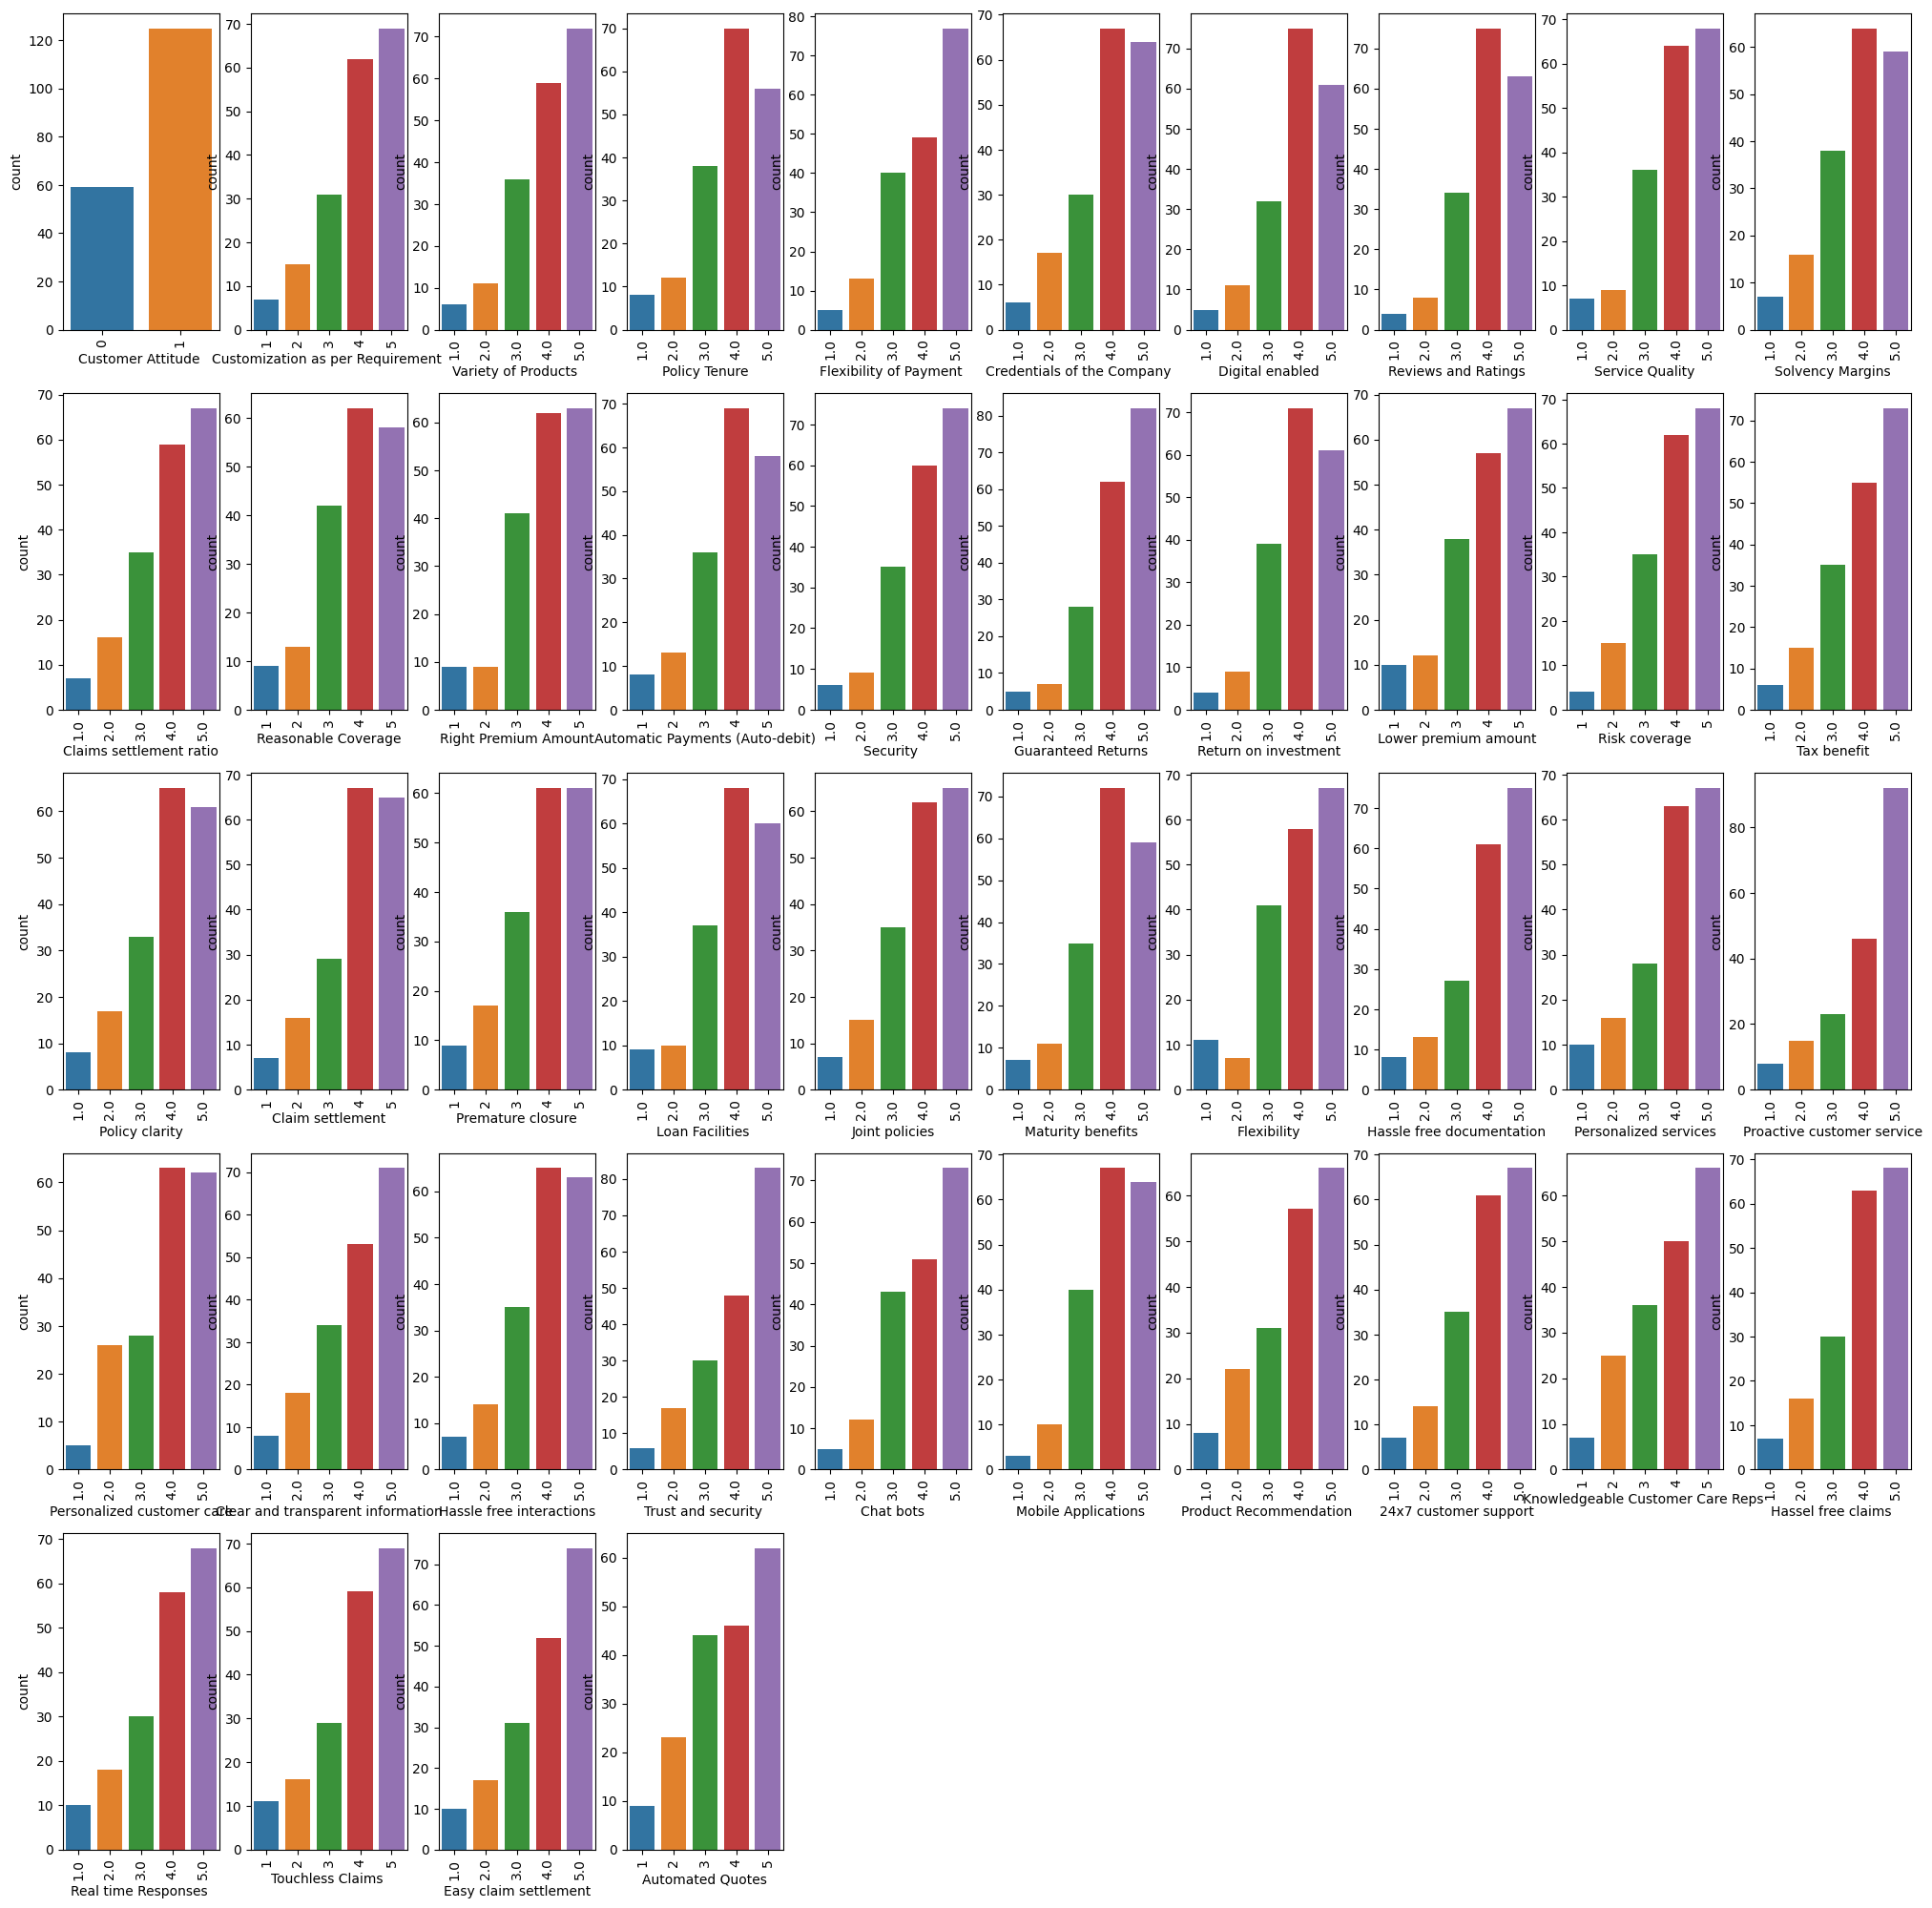

In [13]:
plt.figure(figsize=(25,25))
count=1
for i in df:
    plt.subplot(5,10,count)
    plt.xticks(rotation=90)
    sns.countplot(df[i])
    count+=1
plt.show()

<AxesSubplot:xlabel='Service Quality', ylabel='count'>

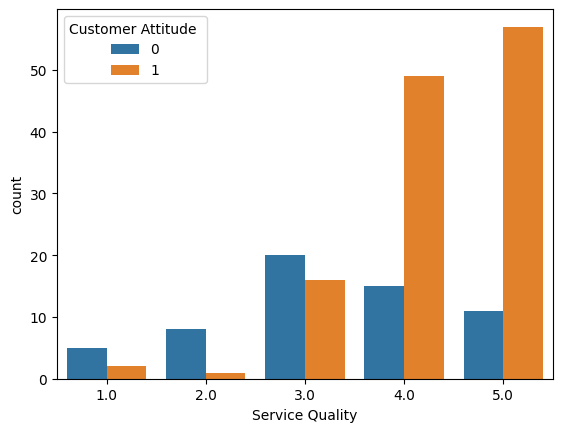

In [37]:
sns.countplot(df["Service Quality"],hue=df["Customer Attitude "])

# most of people prefer to have good service quality 

<AxesSubplot:xlabel='Tax benefit', ylabel='count'>

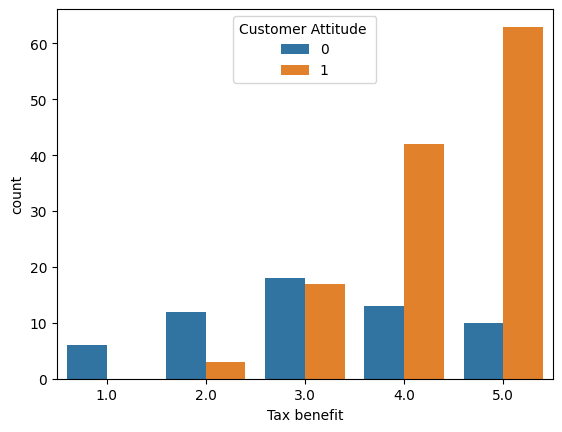

In [15]:
sns.countplot(df["Tax benefit"],hue=df["Customer Attitude "])

# from this plot we can assume that nowdays insurance policy are taken for tax benifit purpose

<AxesSubplot:xlabel='Clear and transparent information', ylabel='count'>

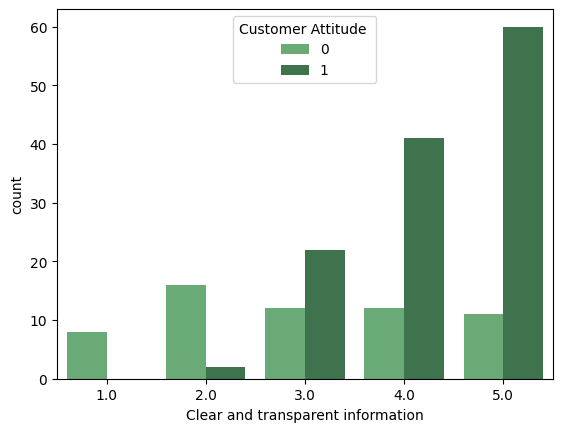

In [16]:
 sns.countplot(df["Clear and transparent information"],hue=df["Customer Attitude "],palette="Greens_d")

### policy provider should be able to  explain the terms and conditions to customer then chances of buying policy increases.

<AxesSubplot:xlabel='Claims settlement ratio', ylabel='count'>

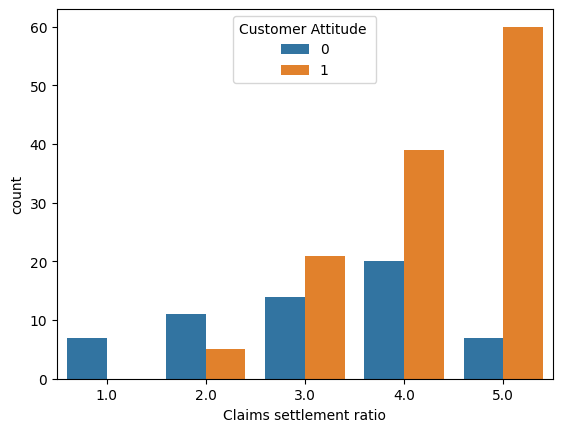

In [46]:
sns.countplot(df["Claims settlement ratio"],hue=df["Customer Attitude "])

# Companies should have good claim settlement ratio which helps to build trust on companies.

<AxesSubplot:xlabel='Loan Facilities ', ylabel='count'>

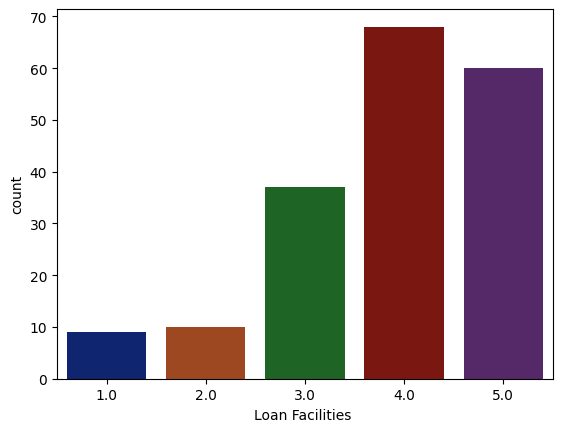

In [17]:
sns.countplot(df["Loan Facilities "],palette="dark")

# while taking the insurance  policy loan facilty is not the important factor

<AxesSubplot:xlabel='Trust and security ', ylabel='count'>

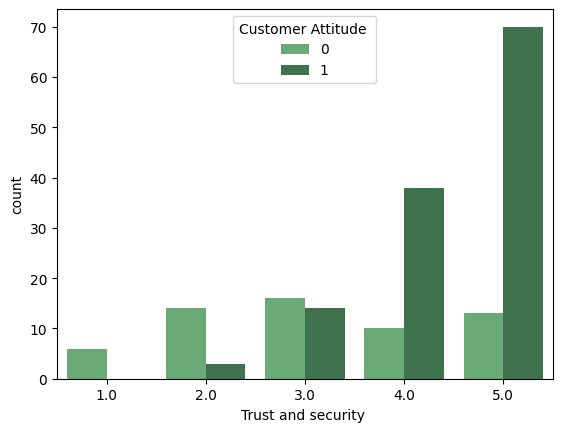

In [18]:
sns.countplot(df["Trust and security "],hue=df["Customer Attitude "],palette="Greens_d")

# if agent can build a trust over a customer policies can be easily sold 

<AxesSubplot:xlabel='Policy Tenure', ylabel='count'>

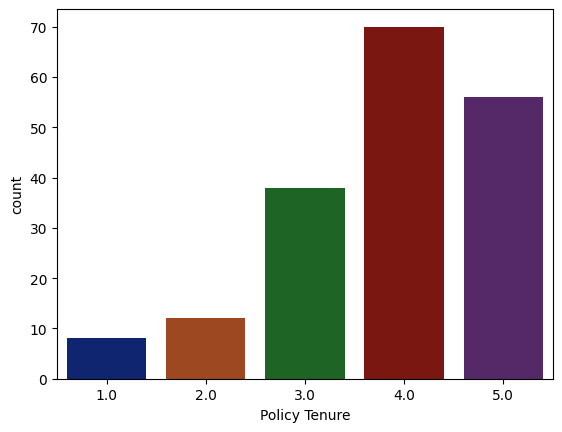

In [41]:
sns.countplot(df["Policy Tenure"],palette="dark")

# Policy is tenure is not the highly affected factor 


<AxesSubplot:xlabel='Flexibility of Payment ', ylabel='count'>

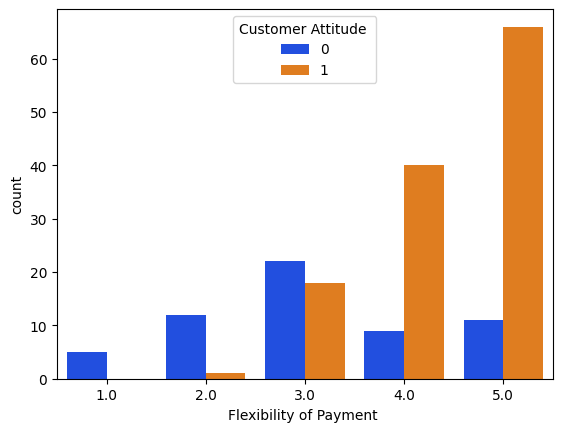

In [19]:
sns.countplot(df["Flexibility of Payment "],hue=df["Customer Attitude "],palette="bright")

## payment flexibility is another the important factor if customer can be able to pay dues according to them for eg. monthly,quaterly,yearly it will increase the sales . company should  not force customer to take insurnace plans according to them.

<AxesSubplot:xlabel='Hassle free documentation', ylabel='count'>

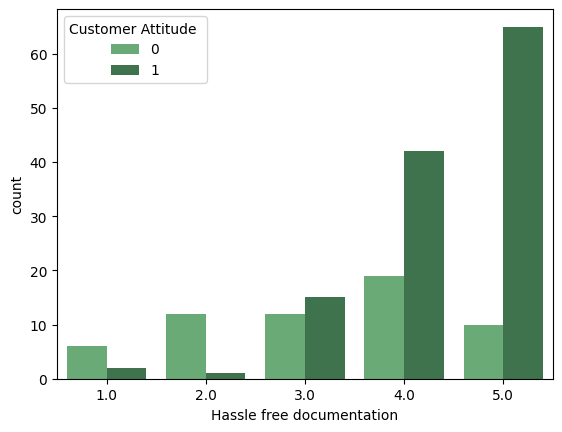

In [45]:
 sns.countplot(df["Hassle free documentation"],hue=df["Customer Attitude "],palette="Greens_d")

#  while taking the policy customer don't wan't to waste his time on documentation process

In [20]:
df1=[df["Mobile Applications"],df["Digital enabled"],df["Chat bots"],df["Automatic Payments (Auto-debit)"]]

In [21]:
df1=pd.DataFrame(df1)

In [22]:
df1=df1.head().T

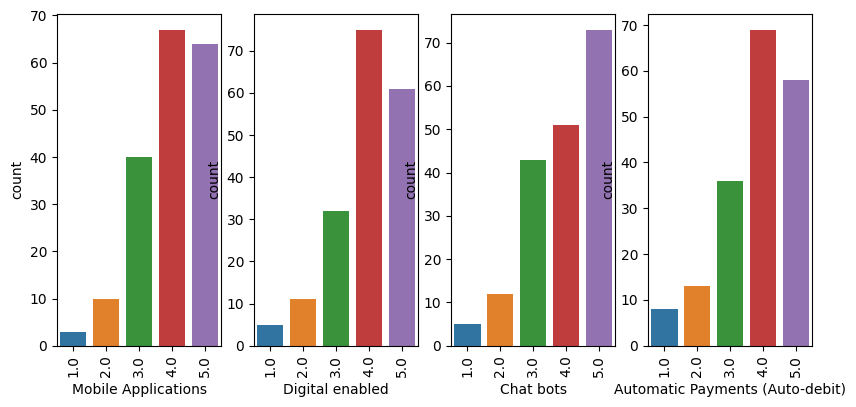

In [23]:
plt.figure(figsize=(25,25))
count=1
for i in df1:
    plt.subplot(5,10,count)
    plt.xticks(rotation=90)
    sns.countplot(df1[i])
    count+=1
plt.show()

# From Above plots we can say that yet peoples are not completely trusting the digital way of taking policies #chatbots are used most to solve their insurance related issues or doughts so companies should add chatbots while making their mobile applications #People have started using Automatic payements for paying their dues

<AxesSubplot:xlabel='Variety of Products ', ylabel='count'>

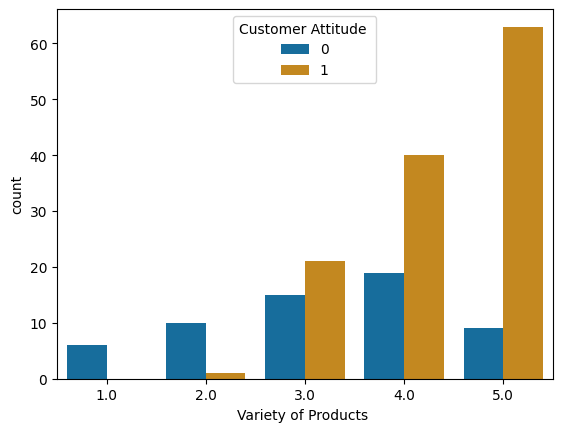

In [24]:
sns.countplot(df["Variety of Products "],hue=df["Customer Attitude "],palette="colorblind")

# company should make variety of products they should not stick on 1 or 2 product

<AxesSubplot:xlabel='Lower premium amount', ylabel='count'>

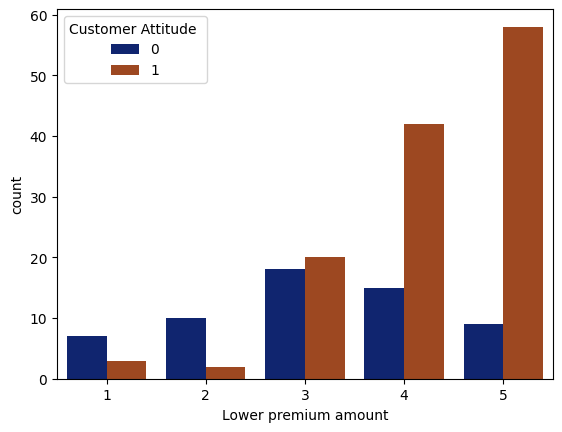

In [47]:
sns.countplot(df["Lower premium amount"],hue=df["Customer Attitude "],palette="dark")

# Company should make insurance policy which will charge affordable premium amount which will be good for attracting the customers in each class 

# Splitting X and Y 

In [25]:
X=df.drop("Customer Attitude ",axis=1)

In [26]:
y=df["Customer Attitude "]

# model building

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [30]:
le=LogisticRegression()
knn=KNeighborsClassifier()   

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model

In [32]:
my_model(le)

train data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.96      0.96      0.96        82

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128

test data
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.86      0.86      0.86        43

    accuracy                           0.79        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.79      0.79      0.79        56



LogisticRegression()

In [33]:
my_model(knn)

train data
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        46
           1       0.85      0.93      0.89        82

    accuracy                           0.85       128
   macro avg       0.85      0.82      0.83       128
weighted avg       0.85      0.85      0.85       128

test data
              precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.85      0.95      0.90        43

    accuracy                           0.84        56
   macro avg       0.80      0.71      0.74        56
weighted avg       0.83      0.84      0.82        56



KNeighborsClassifier()

In [34]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:>

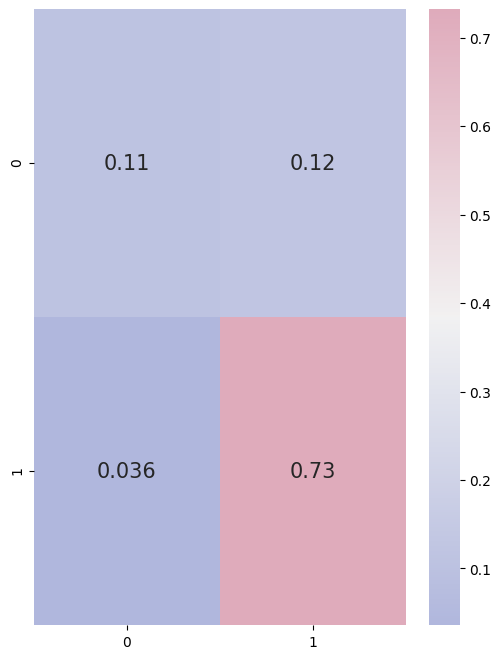

In [35]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(6,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})